## Checking synchrotron kernel with electron power law injection

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from Radiation_simps import Radiation, plotEvolutionFromFile, Ne_fromFile, \
    Ny_fromFile, fitPowerLaw

import setFigureConfig as sfc
import coloring as cl

In [2]:

# properties of system
L_system = 5 * 1e16  # cm
B = 1  # G
# power law injection for source term
inj_N0 = 1e3  # norm
inj_si = -2  # spectral index
inj_min = 1.1
inj_max = 1e7
# Black Body
l_BB = 1  # norm
Theta_BB = 1e-5  # temperature (kT/mc^2)


In [4]:

r = Radiation(
    L=L_system, B=B, UinjUB=1,
    inj_N0=inj_N0, inj_min=inj_min, inj_max=inj_max, inj_si=inj_si,
    Theta_BB=Theta_BB, L_BLR=1, R_BLR=1, z_diss=2,
    yEscFactor=1
)

# set grid
# Tmax = 3
r.setLinTime(dt=1e-3, saveEvery=1)
r.setLogElectronEnergy(eexpmin=0, eexpmax=8, NeE=400)
r.setLogPhotonEnergy(yexpmin=-15, yexpmax=8, NyE=400)

# set initial definitions
# initial electron term
pivot = 1
norm = (1 + inj_si) / (inj_max**(1+inj_si) - inj_min**(1+inj_si))
qe = norm * inj_N0 * (r.eE/pivot)**inj_si
eInitial = qe * ((r.eE > inj_min) & (r.eE < inj_max))
r.setInitalElectronDistribution(Ninitial=eInitial*0)
# initial photon term
yInitial = 0 * r.yE
r.setInitalPhotonDistribution(Ninitial=yInitial)

'''
commented = turned on
uncommented = turned off
'''
# escape term has to be set to 1/s not 2/s
r.turnOff(
    [
        "Qe_injection",
        "Qe_yy",
        # "Le_sync",
        "Le_icT",
        "Le_icKN",
        # "Ly_esc",
        "Ly_yy",
        # "Ly_ssa",
        # "Qy_sync",
        "Qy_icT",
        "Qy_icKN",
        "BB",
        "SSC"
    ]
)
r.turnOn("Qe_powerlaw")

l_B  = 0.0016165231439318074
l_BB = 1.0784281597449708e-13


In [5]:

# Size of the system: for all times L_system
T = 3
one = np.ones(int(T / r.dt) * 2)
zero = np.zeros(int(T / r.dt) * 2)
r.solveUntil(T=T, sArray=one, betaArray=zero, dopplerBBArray=one,
             printEvery=1000)

r.saveToh5("SynchrotronSteadyState.h5")

start calculating..
 2020-01-26 14:19:41.513950
{'Qe_injection': 0, 'Qe_powerlaw': 1, 'Qe_yy': 0, 'Le_sync': 1, 'Le_icT': 0, 'Le_icKN': 0, 'Ly_esc': 1, 'Ly_yy': 0, 'Ly_ssa': 1, 'Qy_sync': 1, 'Qy_icT': 0, 'Qy_icKN': 0, 'BB': 0, 'SSC': 0}
1 of 3000.0
1001 of 3000.0
2001 of 3000.0
3001 of 3000.0
finished calculating!
 2020-01-26 14:19:42.726247


/usr/local/lib/python3.6/dist-packages/pandas/io/pytables.py:278: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->axis0] [items->None]

  f(store)
/usr/local/lib/python3.6/dist-packages/pandas/io/pytables.py:278: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block0_items] [items->None]

  f(store)


/mnt/u/BlazarVariability/Lib/Radiation_simps.py:775: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  axe.plot(self.eE, self.eE**eSlope * Ne, drawstyle="steps-mid")
/mnt/u/BlazarVariability/Lib/Radiation_simps.py:792: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  axg.plot(self.yE, self.yE**ySlope * Ny, drawstyle="steps-mid")


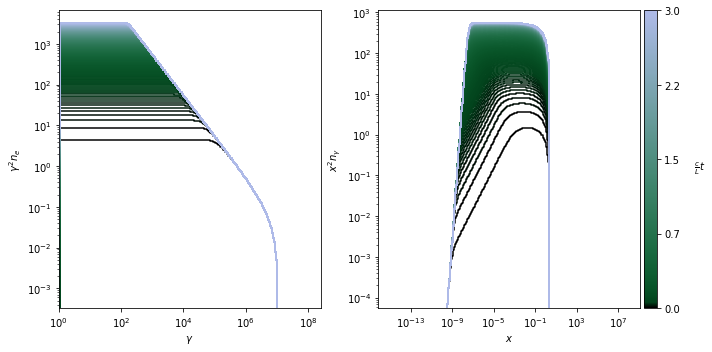

In [6]:
plt.show(r.plotEvolution(BB=False))

### Create plot for thesis

/mnt/u/BlazarVariability/Lib/Radiation_simps.py:1042: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  axg.plot(yE, yE**ySlope * Ny.iloc[i].values, drawstyle="steps-mid")


Fit e 1
norm:  33.00726382695889
si  :  -2.000626335806865
uncertainty: [[ 7.54626581e-05 -6.92007519e-07]
 [-6.92007519e-07  3.74530136e-08]]
Fit e 2
norm:  5.388898697401585e-07
si  :  -3.017802403631119
uncertainty: [[ 4.11962390e-18 -1.01658230e-12]
 [-1.01658230e-12  1.70254454e-06]]

Fit y 1
norm:  7.013057234161424e+16
si  :  1.4285424496891228
uncertainty: [[1.05227786e+30 4.85482124e+12]
 [4.85482124e+12 2.99142887e-05]]

Fit y 2
norm:  5.631069313198026e+16
si  :  -2.002907552458202
uncertainty: [[ 1.79892018e+28 -4.16249435e+10]
 [-4.16249435e+10  1.30372927e-07]]


/mnt/u/BlazarVariability/Lib/Radiation_simps.py:1215: RuntimeWarning: invalid value encountered in log10
  return np.log10(p0) + si * np.log10(x/pivot)


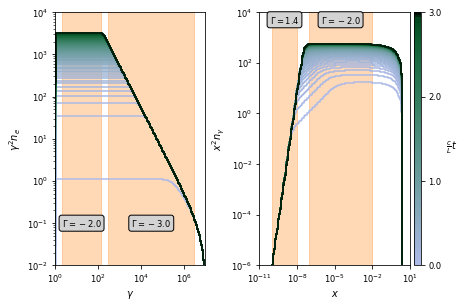

In [7]:

sfc.fullWidth(alpha=0.7)

filename_only = "SynchrotronSteadyState.h5"

fig = plotEvolutionFromFile(
    filename_only, BB=False, cmap=cl.c_time(reverse=True), maxLines=100,
    ind0=1, nTicks=4
)

# electron fit
axe = fig.get_axes()[0]

eE, Ne = Ne_fromFile(filename_only)

# fit 1
fitRange1 = (eE > 2) & (eE < 150)
print("Fit e 1")
axe, popt, pcov = fitPowerLaw(
    eE[fitRange1], Ne.iloc[-1].values[fitRange1],
    pivot=10, guess=[1e3, -2],
    ax=axe, slope=2, height=1e-1, textpos="logCenter"
)
 
# fit 2
fitRange2 = (eE > 300) & (eE < 3e6)
print("Fit e 2")
axe, popt, pcov = fitPowerLaw(
    eE[fitRange2], Ne.iloc[-1].values[fitRange2],
    pivot=1e4, guess=[1e2, -3.17],
    ax=axe, slope=2, height=1e-1, textpos="logCenter"
)

axe.set_ylim(1e-2, 1e4)
axe.set_xlim(1, 1e7)


# photon fit
axy = fig.get_axes()[1]

yE, Ny = Ny_fromFile(filename_only)

# fit 1
fitRange1 = (yE > 1e-10) & (yE < 1e-8)
print("\nFit y 1")
axy, popt, pcov = fitPowerLaw(
    yE[fitRange1], Ny.iloc[-1].values[fitRange1],
    pivot=1e-8, guess=[1e1, 1.517],
    ax=axy, slope=2, height=5e3, textpos="logCenter"
)

# fit 2
fitRange2 = (yE > 8e-8) & (yE < 1e-2)
print("\nFit y 2")
axy, popt, pcov = fitPowerLaw(
    yE[fitRange2], Ny.iloc[-1].values[fitRange2],
    pivot=1e-7, guess=[1e3, -1.57],
    ax=axy, slope=2, height=5e3, textpos="logCenter"
)

# set limits
axy.set_xlim(1e-11, 1e1)
axy.set_ylim(1e-6, 1e4)

fig.tight_layout()
fig.savefig("2_SynchrotronSteadyState.pdf")